In [1]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [2]:
# Load image in grayscale format

pcb_color = cv2.imread('images/pcb/pcb_00071.png',cv2.IMREAD_COLOR)
pcb_gray = cv2.imread('images/pcb/pcb_00071.png',cv2.IMREAD_GRAYSCALE)


In [3]:
b,g,r = cv2.split(pcb_color)
road_rgb = cv2.merge( [r,g,b])

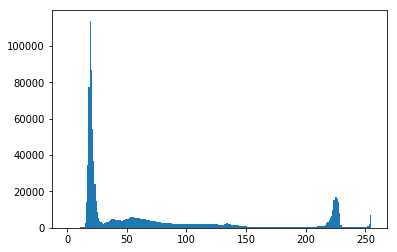

In [30]:
#histogram

import matplotlib.cm as cm

hist_np, bins = np.histogram( pcb_gray.ravel(),256,[0,256])

hist_cv = cv2.calcHist( [pcb_gray],[0],None,[256],[0,256])

# Plot an histogram with matplotlib
%matplotlib inline
plt.hist(pcb_gray.ravel(), bins=256, range=(0,255))
plt.show()

In [4]:
img_link = 'images/pcb/pcb_00071.png'

In [5]:
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

def update(omega=10, sigma_color=20, sigma_space=50):
    img_bilat = cv2.bilateralFilter( img, omega, sigma_color, sigma_space)

    tools.multiPlot( 1, 2, ( img, img_bilat), ( 'Original image', 'Bilateral filtering'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, omega = [1, 5, 10, 20, 30] , sigma_color = (10, 250, 10), sigma_space=(10,250,10))

interactive(children=(Dropdown(description='omega', index=2, options=(1, 5, 10, 20, 30), value=10), IntSlider(…

<function __main__.update(omega=10, sigma_color=20, sigma_space=50)>

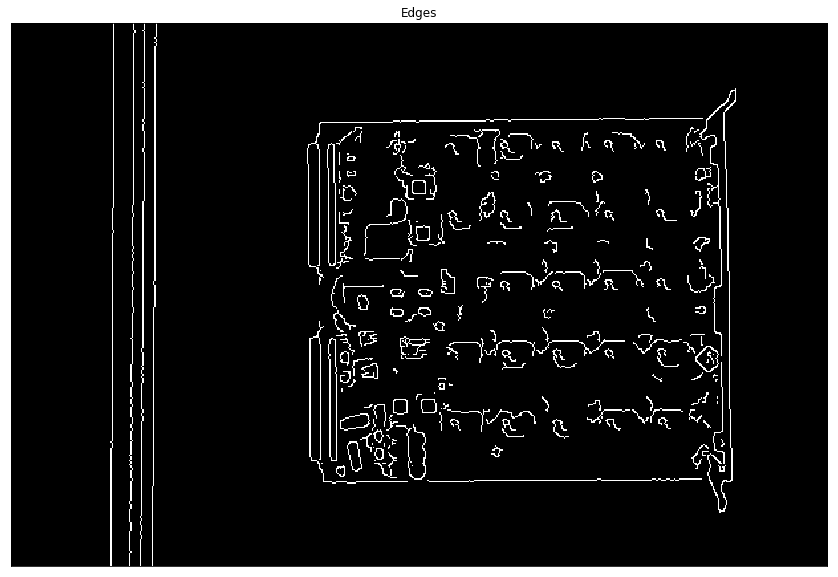

In [48]:
# prefiltrering and scaling 

#img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

#img = cv2.imread( 'Images/Pattern_inspection2.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/Building.png', cv2.IMREAD_GRAYSCALE)
img = cv2.bilateralFilter( img_base, 20, 100, 60) #cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/1_HQ00020.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.imread( 'Images/image.000078.png', cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 11
imgFilt = cv2.GaussianBlur( img, ( iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

960 1280


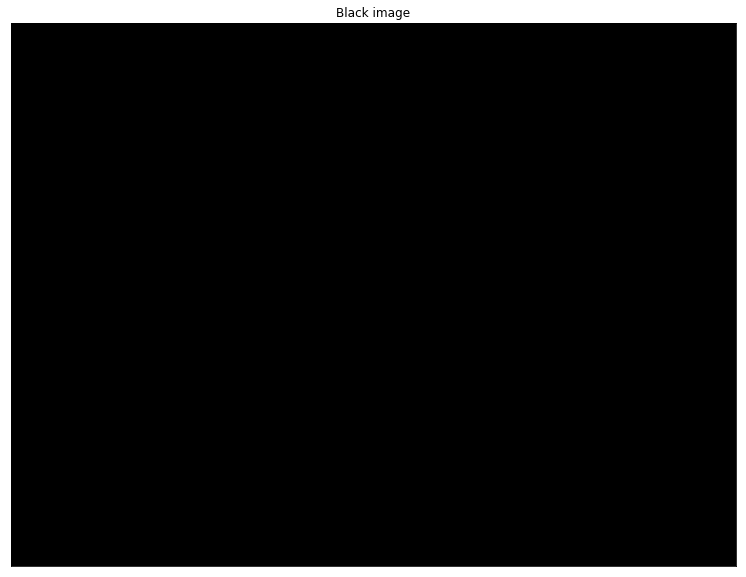

In [17]:
height, width = img.shape[:2]
print(height,width)
mat = np.zeros((height,width))
img_black = Image.fromarray(mat, 'RGB')
tools.multiPlot( 1, 1, ( img_black,),
                       ( 'Black image',),
                        cmap_tuple=( cm.gray,))


In [50]:
def update( minLineLength=80, maxLineGap=10):
    #img = cv2.bilateralFilter( img, 10, 80, 60) 
    img_base = cv2.imread(img_link, cv2.IMREAD_COLOR)
    img = cv2.bilateralFilter( img_base, 20, 100, 60) 
    b,g,r = cv2.split(img)
    img_rgb = cv2.merge([r,g,b]) 
    height, width = img.shape[:2]
    print(height,width)
    mat = np.zeros((height,width,3)) 
    
    img_black_test = cv2.imwrite('black_img.png', mat)
    img_black=cv2.imread('black_img.png',cv2.IMREAD_COLOR)
    lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
    for l in lines:
        for x1,y1,x2,y2 in l:
            cv2.line(img_black,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),4) 
    
    img_black_test2 = cv2.imwrite('black_img.png', img_black)
    
    img_black2=cv2.imread('black_img.png',cv2.IMREAD_GRAYSCALE)
    
    iReducFactor = 2
    iStart = iReducFactor // 2
    imgReduc = img_black2[iStart::iReducFactor, iStart::iReducFactor]
    
    print(imgReduc.shape, edges.shape)
    
    bit_and = cv2.bitwise_and(imgReduc,edges) 

    tools.multiPlot( 2, 2, ( bit_and, edges, imgReduc,img_black),
                     ( 'Classification', 'Canny', 'Lines_reduc','Lines'),
                     cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray))

interact(update, minLineLength = (10, 150, 10), maxLineGap = (10, 90, 5))

interactive(children=(IntSlider(value=80, description='minLineLength', max=150, min=10, step=10), IntSlider(va…

<function __main__.update(minLineLength=80, maxLineGap=10)>

820 1232
(410, 616) (410, 616)


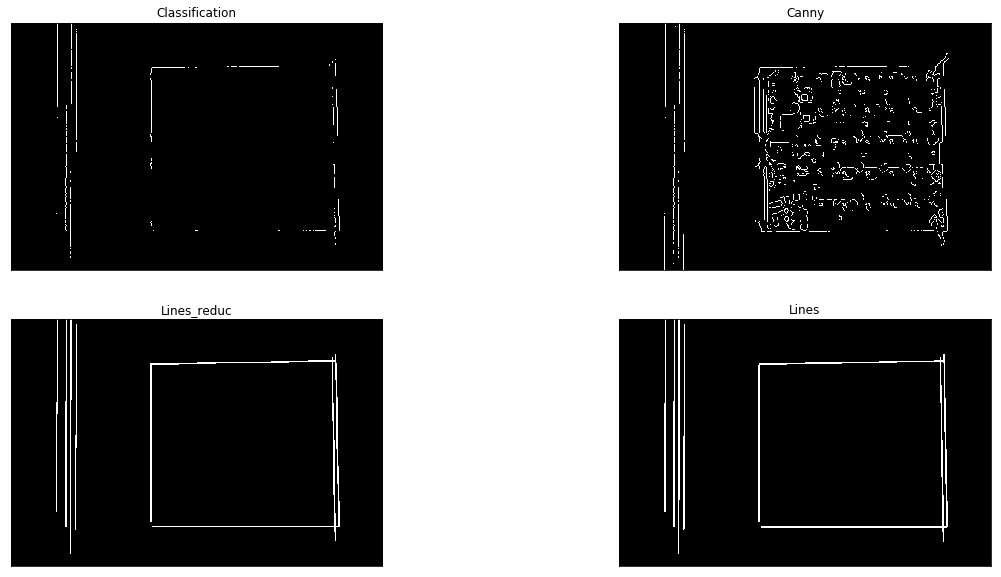

In [51]:
minLineLength = 10
maxLineGap=90
img_base = cv2.imread(img_link, cv2.IMREAD_COLOR)
img = cv2.bilateralFilter( img_base, 20, 100, 60)
b,g,r = cv2.split(img)
img_rgb = cv2.merge([r,g,b]) 
height, width = img.shape[:2]
print(height,width)
mat = np.zeros((height,width,3)) 
    
img_black_test = cv2.imwrite('black_img.png', mat)
img_black=cv2.imread('black_img.png',cv2.IMREAD_COLOR)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img_black,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 
    
img_black_test2 = cv2.imwrite('black_img.png', img_black)
    
img_black2=cv2.imread('black_img.png',cv2.IMREAD_GRAYSCALE)
    
iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = img_black2[iStart::iReducFactor, iStart::iReducFactor]
    
print(imgReduc.shape, edges.shape)
    
bit_and = cv2.bitwise_and(imgReduc,edges) 

bit_and_test = cv2.imwrite('bit_and.png', bit_and)

tools.multiPlot( 2, 2, ( bit_and, edges, imgReduc,img_black),
                     ( 'Classification', 'Canny', 'Lines_reduc','Lines'),
                     cmap_tuple=( cm.gray, cm.gray, cm.gray, cm.gray))


In [52]:
cv2.imwrite('edge.png', edges)

True

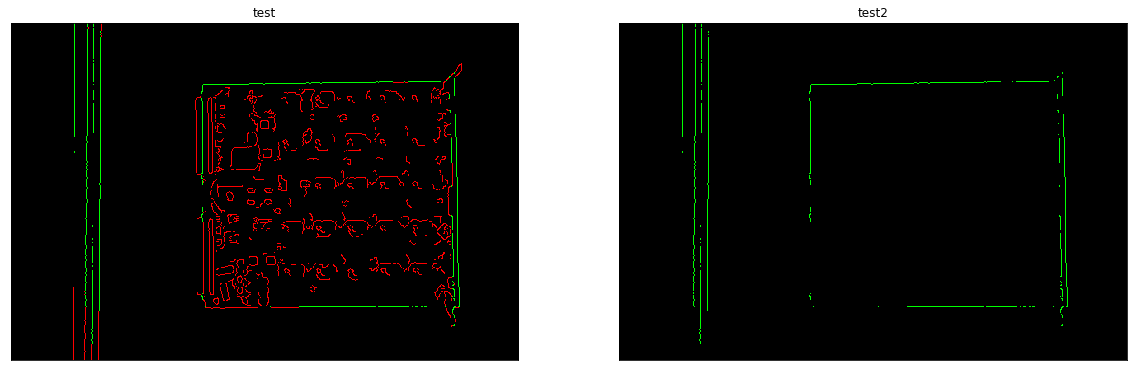

In [53]:
edge_open = cv2.imread('edge.png', cv2.IMREAD_COLOR)
img_bit_and = cv2.imread( 'bit_and.png', cv2.IMREAD_COLOR)

img_bit_and[:,:,0] = 0
img_bit_and[:,:,2] = 0

edge_open[:,:,0] -= img_bit_and[:,:,1]
edge_open[:,:,1] = img_bit_and[:,:,1]
edge_open[:,:,2] = 0

tools.multiPlot( 1, 2, ( edge_open, img_bit_and,),
                       ( 'test', 'test2', ),
                        cmap_tuple=( cm.gray, cm.gray,))